In [1]:
!pwd; ls

/content
datalab


In [0]:
# import os
# os.chdir('..')

In [0]:
import os
HOME_PATH = os.getcwd()

In [0]:
from google.colab import auth
auth.authenticate_user()
GCS_BUCKET = 'ysono-ml'
# !export GCS_BUCKET='ysono-ml'

In [14]:
# import tensorflow as tf
# print(tf.test.gpu_device_name())

/device:GPU:0


## Download carla datasets

In [0]:
import glob

In [6]:
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/udacity-rgb.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/chinkiat1-rgb.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/chinkiat2-rgb.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/faisall-rgb.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/phmagic-world_2_little_cars-rgb.tgz .
  
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/udacity-road_vehicle-sparse-png.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/chinkiat1-road_vehicle-sparse-png.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/chinkiat2-road_vehicle-sparse-png.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/faisall-road_vehicle-sparse-png.tgz .
!gsutil cp gs://{GCS_BUCKET}/datasets/carla/phmagic-world_2_little_cars-road_vehicle-sparse-png.tgz .

Copying gs://ysono-ml/datasets/carla/udacity-rgb.tgz...
/
Operation completed over 1 objects/564.4 MiB.                                    
Copying gs://ysono-ml/datasets/carla/chinkiat1-rgb.tgz...
- [1 files][556.3 MiB/556.3 MiB]   57.4 MiB/s                                   
Operation completed over 1 objects/556.3 MiB.                                    
Copying gs://ysono-ml/datasets/carla/chinkiat2-rgb.tgz...
/ [1 files][533.8 MiB/533.8 MiB]                                                
Operation completed over 1 objects/533.8 MiB.                                    
Copying gs://ysono-ml/datasets/carla/faisall-rgb.tgz...
/ [1 files][  2.3 GiB/  2.3 GiB]   61.4 MiB/s                                   
Operation completed over 1 objects/2.3 GiB.                                      
Copying gs://ysono-ml/datasets/carla/phmagic-world_2_little_cars-rgb.tgz...
\ [1 files][  1.2 GiB/  1.2 GiB]   63.9 MiB/s                                   
Operation completed over 1 objects/1.2 GiB

In [0]:
# !find CameraRGB -type d -exec sh -c 'echo {} && ls -l {} | grep -v ^d | tail -n +2 | head -5' \;

#### Udacity data

In [0]:
!mkdir -p data/udacity
!tar -C data/udacity -zxf udacity-rgb.tgz
!tar -C data/udacity -zxf udacity-road_vehicle-sparse-png.tgz

In [0]:
assert len(list(glob.glob('data/udacity/Train/CameraRGB/udacity-*.png'))) == 1000
assert len(list(glob.glob('data/udacity/CameraSeg/udacity-*.png'))) == 1000

#### chinkiat data

In [0]:
!mkdir -p data/chinkiat1
!tar -C data/chinkiat1 -zxf chinkiat1-rgb.tgz
!tar -C data/chinkiat1 -zxf chinkiat1-road_vehicle-sparse-png.tgz

In [0]:
assert len(list(glob.glob('data/chinkiat1/CameraRGB/F[67]?-*.png'))) == 1000
assert len(list(glob.glob('data/chinkiat1/CameraSeg/F[67]?-*.png'))) == 1000

In [0]:
!mkdir -p data/chinkiat2
!tar -C data/chinkiat2 -zxf chinkiat2-rgb.tgz
!tar -C data/chinkiat2 -zxf chinkiat2-road_vehicle-sparse-png.tgz

In [0]:
assert len(list(glob.glob('data/chinkiat2/CameraRGB/M*.png'))) == 1000
assert len(list(glob.glob('data/chinkiat2/CameraSeg/M*.png'))) == 1000

#### Faisall data

In [0]:
!mkdir -p data/faisall
!tar -C data/faisall -zxf faisall-rgb.tgz
!tar -C data/faisall -zxf faisall-road_vehicle-sparse-png.tgz

In [0]:
assert len(list(glob.glob('data/faisall/Train/CameraRGB/*.png'))) == 3822
assert len(list(glob.glob('data/faisall/Valid/CameraRGB/*.png'))) == 500
assert len(list(glob.glob('data/faisall/Test/CameraRGB/*.png'))) == 500
assert len(list(glob.glob('data/faisall/Train/CameraSeg/*.png'))) == 3822
assert len(list(glob.glob('data/faisall/Valid/CameraSeg/*.png'))) == 500
assert len(list(glob.glob('data/faisall/Test/CameraSeg/*.png'))) == 500

### phmagic data

In [0]:
!tar -C data -zxf phmagic-world_2_little_cars-rgb.tgz
!tar -C data -zxf phmagic-world_2_little_cars-road_vehicle-sparse-png.tgz

In [0]:
assert len(list(glob.glob('data/phmagic-world_2_little_cars/*/CameraRGB/*.png'))) == 2800
assert len(list(glob.glob('data/phmagic-world_2_little_cars-3cls/*/CameraSeg/*.png'))) == 2800

#### Make sure I didn't override files

In [0]:
import glob

assert len(list(glob.glob('data/udacity/Train/CameraRGB/udacity-*.png'))) == 1000
assert len(list(glob.glob('data/udacity/CameraSeg/udacity-*.png'))) == 1000

assert len(list(glob.glob('data/chinkiat1/CameraRGB/F[67]?-*.png'))) == 1000
assert len(list(glob.glob('data/chinkiat1/CameraSeg/F[67]?-*.png'))) == 1000

assert len(list(glob.glob('data/faisall/Train/CameraRGB/*.png'))) == 3822
assert len(list(glob.glob('data/faisall/Valid/CameraRGB/*.png'))) == 500
assert len(list(glob.glob('data/faisall/Test/CameraRGB/*.png'))) == 500
assert len(list(glob.glob('data/faisall/Train/CameraSeg/*.png'))) == 3822
assert len(list(glob.glob('data/faisall/Valid/CameraSeg/*.png'))) == 500
assert len(list(glob.glob('data/faisall/Test/CameraSeg/*.png'))) == 500

assert len(list(glob.glob('data/phmagic-world_2_little_cars/*/CameraRGB/*.png'))) == 2800
assert len(list(glob.glob('data/phmagic-world_2_little_cars-3cls/*/CameraSeg/*.png'))) == 2800

#### Cleanup

In [0]:
!rm udacity-rgb.tgz chinkiat1-rgb.tgz chinkiat2-rgb.tgz faisall-rgb.tgz phmagic-world_2_little_cars-rgb.tgz
!rm udacity-road_vehicle-sparse-png.tgz chinkiat1-road_vehicle-sparse-png.tgz chinkiat2-road_vehicle-sparse-png.tgz faisall-road_vehicle-sparse-png.tgz phmagic-world_2_little_cars-road_vehicle-sparse-png.tgz

## Clone from git; cd; set up

### clone git via ssh

In [20]:
!apt-get install -y keychain

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  ssh-askpass
The following NEW packages will be installed:
  keychain
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 27.9 kB of archives.
After this operation, 74.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 keychain all 2.8.2-0.1 [27.9 kB]
Fetched 27.9 kB in 0s (81.8 kB/s)
Selecting previously unselected package keychain.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../keychain_2.8.2-0.1_all.deb ...
Unpacking keychain (2.8.2-0.1) ...
Setting up keychain (2.8.2-0.1) ...


In [ ]:
# Here, download id_rsa. Code omitted.

In [22]:
!if [ ! -d ICNet-tensorflow ]; then eval `ssh-agent -s` && ssh-add id_rsa && ssh -o "StrictHostKeyChecking no" git@bitbucket.org && git clone git@bitbucket.org:ysono/icnet-tensorflow.git ICNet-tensorflow; fi

Agent pid 2643
Identity added: id_rsa (id_rsa)
PTY allocation request failed on channel 0
logged in as ysono.

You can use git or hg to connect to Bitbucket. Shell access is disabled.
Connection to bitbucket.org closed.
Cloning into 'ICNet-tensorflow'...
remote: Counting objects: 503, done.
remote: Compressing objects: 100% (340/340), done.
remote: Total 503 (delta 267), reused 319 (delta 155)
Receiving objects: 100% (503/503), 14.51 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (267/267), done.


### Changing directory!!

In [23]:
os.chdir('ICNet-tensorflow')
!pwd

/content/ICNet-tensorflow


In [64]:
## If fetching later ...

!eval `ssh-agent -s` && ssh-add {HOME_PATH}/id_rsa && git fetch

Agent pid 22953
Identity added: /content/id_rsa (/content/id_rsa)
remote: Counting objects: 4, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (4/4), done.
From bitbucket.org:ysono/icnet-tensorflow
   d1c0636..390a1bd  ysono/quartercrop -> origin/ysono/quartercrop


In [162]:
!git checkout ef3e0c0184e00b138b2bc52ebcfc2bc7ee1132fa

!git rev-parse HEAD

Previous HEAD position was caedb6b... change correctness cost to softmax
HEAD is now at ef3e0c0... freeze and infer scripts
ef3e0c0184e00b138b2bc52ebcfc2bc7ee1132fa


### Download the model file

In [59]:
# !gsutil cp gs://{GCS_BUCKET}/models/icnet/cityscape-hellochick/icnet_cityscapes_trainval_90k.npy model/
!gsutil cp gs://{GCS_BUCKET}/models/icnet/cityscape-hellochick/icnet_cityscapes_trainval_90k_bnnomerge.npy model/

Copying gs://ysono-ml/models/icnet/cityscape-hellochick/icnet_cityscapes_trainval_90k_bnnomerge.npy...
- [1 files][ 25.7 MiB/ 25.7 MiB]                                                
Operation completed over 1 objects/25.7 MiB.                                     


### Write the list file

In [0]:
import glob
import os
import re

def reduce_paths(paths):
    filename_to_path = {}
    for path in glob.glob(os.path.abspath(paths)):
        filename = os.path.basename(path)
        filename_to_path[filename] = path
    return filename_to_path

def multiplicity(filename):
    '''
    I have a mac and can't generate more Carla data, so make the best use of the
    datasets donated by other Udacity students.
    The datasets with file names `F[0-9]-*.png` and `F10-*.png` has a paucity of
    cars.
    Therefore augment the other datasets:
    - the dataset provided by Udacity, whose filenames are `0.png` to `999.png`
    - the student-donated batch with more cars: `F61-*.png` and `F70-*.png`
    '''
    
#     if re.search('^\d{1,3}\.png$', filename):
#         return 2
#     if re.search('^F[67]\d-.*\.png$', filename):
#         return 2
#     else: return 1

    return 1

def write_list(train_paths, label_paths, out_path, do_append):
    train_map = reduce_paths(train_paths)
    label_map = reduce_paths(label_paths)
    assert train_map.keys() == label_map.keys()

    fopen_mode = 'a' if do_append else 'w'
    with open(out_path, fopen_mode) as f:
        for filename in sorted(train_map.keys()):
            mult = multiplicity(filename)
          
            for _ in range(mult):
                f.write(train_map[filename])
                f.write(' ')
                f.write(label_map[filename])
                f.write('\n')

                
temp_collections = [
    ('data/udacity/Train/CameraRGB/udacity-*.png',
     'data/udacity/CameraSeg/udacity-*.png'),
    ('data/chinkiat1/CameraRGB/F[67]?-*.png',
     'data/chinkiat1/CameraSeg/F[67]?-*.png'),
    ('data/chinkiat2/CameraRGB/*.png',
     'data/chinkiat2/CameraSeg/*.png'),
    ('data/faisall/Train/CameraRGB/*.png',
     'data/faisall/Train/CameraSeg/*.png'),
    ('data/faisall/Valid/CameraRGB/*.png',
     'data/faisall/Valid/CameraSeg/*.png'),
    ('data/faisall/Test/CameraRGB/*.png',
     'data/faisall/Test/CameraSeg/*.png')
]
# for i in range(14):
#     epsd = str(i).zfill(2)
#     in_paths = 'data/phmagic-world_2_little_cars/episode_00{}/CameraRGB/*.png'.format(str(epsd).zfill(2))
#     out_dir = 'data/phmagic-world_2_little_cars-3cls/episode_00{}/CameraSeg/*.png'.format(str(epsd).zfill(2))
#     temp_collections.append((in_paths, out_dir))
for i, (train_paths, label_paths) in enumerate(temp_collections):
    do_append = (i != 0)
    write_list(
        os.path.join(HOME_PATH, train_paths),
        os.path.join(HOME_PATH, label_paths),
        'list/carla_train_list-all.txt',
        do_append=do_append)

    
# temp_collections = [
#     ('data/udacity/Train/CameraRGB/udacity-*.png',
#      'data/udacity/CameraSeg/udacity-*.png'),
#     ('data/chinkiat1/CameraRGB/F[67]?-*.png',
#      'data/chinkiat1/CameraSeg/F[67]?-*.png'),
#     ('data/chinkiat2/CameraRGB/*.png',
#      'data/chinkiat2/CameraSeg/*.png')
# ]
# for i, (train_paths, label_paths) in enumerate(temp_collections):
#     do_append = (i != 0)
#     write_list(
#         os.path.join(HOME_PATH, train_paths),
#         os.path.join(HOME_PATH, label_paths),
#         'list/carla_train_list-udacity_and_chikiat.txt',
#         do_append=do_append)

# temp_collections = [
#     ('data/faisall/Train/CameraRGB/*.png',
#      'data/faisall/Train/CameraSeg/*.png'),
#     ('data/faisall/Valid/CameraRGB/*.png',
#      'data/faisall/Valid/CameraSeg/*.png'),
#     ('data/faisall/Test/CameraRGB/*.png',
#      'data/faisall/Test/CameraSeg/*.png')
# ]
# for i, (train_paths, label_paths) in enumerate(temp_collections):
#     do_append = (i != 0)
#     write_list(
#         os.path.join(HOME_PATH, train_paths),
#         os.path.join(HOME_PATH, label_paths),
#         'list/carla_train_list-faisall.txt',
#         do_append=do_append)

In [0]:
assert sum(1 for line in open('list/carla_train_list-all.txt')) == (1000 + 1000 + 1000 + 3822 + 500 + 500) #  + 2800)
# assert sum(1 for line in open('list/carla_train_list-udacity_and_chikiat.txt')) == (1000 + 1000 + 1000)
# assert sum(1 for line in open('list/carla_train_list-faisall.txt')) == (3822 + 500 + 500)

In [158]:
# Just a reminder that if using train.py's default batch size of 16,
# need this many steps to cover all instances in the training dataset.
print(sum(1 for line in open('list/carla_train_list-all.txt')) / 16)
# print(sum(1 for line in open('list/carla_train_list-udacity_and_chikiat.txt')) / 16)
# print(sum(1 for line in open('list/carla_train_list-faisall.txt')) / 16)

488.875


## Run

### Prepare snapshots dir for training

In [154]:
## If discarding latest snapshots ...
!rm -r snapshots/
!mkdir snapshots
# !gsutil    cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-lossfn-hybrid-fscore-correctness-run05/checkpoint snapshots/
# !gsutil -m cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-lossfn-hybrid-fscore-correctness-run05/model.ckpt-800.* snapshots/

!gsutil    cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run07/checkpoint snapshots/
!gsutil -m cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run07/model.ckpt-450.* snapshots/

# !gsutil    cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-softmax_correctness-run00/checkpoint snapshots/
# !gsutil -m cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-softmax_correctness-run00/model.ckpt-1200.* snapshots/

# !gsutil    cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-centercrop-run06/checkpoint snapshots/
# !gsutil -m cp gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-centercrop-run06/model.ckpt-800.* snapshots/

Copying gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run07/checkpoint...
/ [1 files][  487.0 B/  487.0 B]                                                
Operation completed over 1 objects/487.0 B.                                      
Copying gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run07/model.ckpt-450.data-00000-of-00001...
Copying gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run07/model.ckpt-450.index...
Copying gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run07/model.ckpt-450.meta...
- [3/3 files][ 54.4 MiB/ 54.4 MiB] 100% Done                                    
Operation completed over 3 objects/54.4 MiB.                                     


In [155]:
## Check contents of snapshots/
!ls -lh snapshots
!cat snapshots/checkpoint

total 55M
-rw-r--r-- 1 root root  487 Jun  4 00:14 checkpoint
-rw-r--r-- 1 root root  52M Jun  4 00:14 model.ckpt-450.data-00000-of-00001
-rw-r--r-- 1 root root  22K Jun  4 00:14 model.ckpt-450.index
-rw-r--r-- 1 root root 3.0M Jun  4 00:14 model.ckpt-450.meta
model_checkpoint_path: "model.ckpt-450"
all_model_checkpoint_paths: "model.ckpt-0"
all_model_checkpoint_paths: "model.ckpt-50"
all_model_checkpoint_paths: "model.ckpt-100"
all_model_checkpoint_paths: "model.ckpt-150"
all_model_checkpoint_paths: "model.ckpt-200"
all_model_checkpoint_paths: "model.ckpt-250"
all_model_checkpoint_paths: "model.ckpt-300"
all_model_checkpoint_paths: "model.ckpt-350"
all_model_checkpoint_paths: "model.ckpt-400"
all_model_checkpoint_paths: "model.ckpt-450"


In [93]:
## If overriding latest model within snapshots/ dir ...
!echo "model_checkpoint_path: \"model.ckpt-1200\"\nall_model_checkpoint_paths: \"model.ckpt-1200\"" > snapshots/checkpoint
!cat snapshots/checkpoint

model_checkpoint_path: "model.ckpt-1200"
all_model_checkpoint_paths: "model.ckpt-1200"


In [0]:
## If purging some leftover checkpoints ...
!rm snapshots/model.ckpt-800.*

In [0]:
!rm -r snapshots

### Prepare input list for training

In [0]:
!rm list/carla_train_list.txt
!ln -s carla_train_list-all.txt list/carla_train_list.txt

In [0]:
!rm list/carla_train_list.txt
!ln -s carla_train_list-udacity_and_chikiat.txt list/carla_train_list.txt

In [0]:
!rm list/carla_train_list.txt
!ln -s carla_train_list-faisall.txt list/carla_train_list.txt

In [31]:
!ls -lh list/*txt

-rw-r--r-- 1 root root 1.6M Jun  3 15:58 list/ade20k_train_list.txt
-rw-r--r-- 1 root root 163K Jun  3 15:58 list/ade20k_val_list.txt
-rw-r--r-- 1 root root 1.3M Jun  3 15:58 list/carla_train_list-all.txt
lrwxrwxrwx 1 root root   24 Jun  3 15:58 list/carla_train_list.txt -> carla_train_list-all.txt
-rwxr-xr-x 1 root root 390K Jun  3 15:58 list/cityscapes_train_list.txt
-rwxr-xr-x 1 root root  65K Jun  3 15:58 list/cityscapes_val_list.txt


In [99]:
!cat ./list/carla_train_list.txt | sort | uniq | wc -l
print(1000 + 1000 + 1000 + 3822 + 500 + 500 + 2800)

10622
10622


In [77]:
# debug... write 3 lines only
!head -3 list/carla_train_list-all.txt > list/carla_train_list_3lines.txt
!rm list/carla_train_list.txt
!ln -s carla_train_list_3lines.txt list/carla_train_list.txt
!cat list/carla_train_list.txt

/content/data/udacity/Train/CameraRGB/udacity-0.png /content/data/udacity/CameraSeg/udacity-0.png
/content/data/udacity/Train/CameraRGB/udacity-1.png /content/data/udacity/CameraSeg/udacity-1.png
/content/data/udacity/Train/CameraRGB/udacity-10.png /content/data/udacity/CameraSeg/udacity-10.png


### Train

In [164]:
!python train.py --train-beta-gamma --num-steps 801 --loss_mult_nonego_car 2.5 --loss_mult_road 1.5 --learning-rate 1e-6

!gsutil -m cp snapshots/* gs://{GCS_BUCKET}/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run08/

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-06-04 00:23:19.940182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-06-04 00:23:19.940720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 10.88GiB
2018-06-04 00:23:19.940806: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2018-06-04 00:23:20.341830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExec

step 77 	 total loss = 0.597, sub4 = 0.603, sub24 = 0.374, sub124 = 0.342 (1.805 sec/step)
step 78 	 total loss = 0.384, sub4 = 0.393, sub24 = 0.229, sub124 = 0.220 (1.823 sec/step)
step 79 	 total loss = 0.284, sub4 = 0.219, sub24 = 0.184, sub124 = 0.165 (1.816 sec/step)
step 80 	 total loss = 0.366, sub4 = 0.348, sub24 = 0.212, sub124 = 0.216 (1.842 sec/step)
step 81 	 total loss = 0.387, sub4 = 0.341, sub24 = 0.250, sub124 = 0.223 (1.835 sec/step)
step 82 	 total loss = 0.382, sub4 = 0.302, sub24 = 0.250, sub124 = 0.225 (1.845 sec/step)
step 83 	 total loss = 0.284, sub4 = 0.256, sub24 = 0.175, sub124 = 0.164 (1.814 sec/step)
step 84 	 total loss = 0.605, sub4 = 0.546, sub24 = 0.392, sub124 = 0.351 (1.845 sec/step)
step 85 	 total loss = 0.388, sub4 = 0.341, sub24 = 0.258, sub124 = 0.221 (1.817 sec/step)
step 86 	 total loss = 0.347, sub4 = 0.276, sub24 = 0.227, sub124 = 0.203 (1.814 sec/step)
step 87 	 total loss = 0.441, sub4 = 0.368, sub24 = 0.282, sub124 = 0.260 (1.846 sec/step)

step 168 	 total loss = 0.356, sub4 = 0.290, sub24 = 0.232, sub124 = 0.207 (1.782 sec/step)
step 169 	 total loss = 0.362, sub4 = 0.309, sub24 = 0.218, sub124 = 0.216 (1.840 sec/step)
step 170 	 total loss = 0.295, sub4 = 0.308, sub24 = 0.187, sub124 = 0.161 (1.810 sec/step)
step 171 	 total loss = 0.331, sub4 = 0.309, sub24 = 0.200, sub124 = 0.192 (1.912 sec/step)
step 172 	 total loss = 0.425, sub4 = 0.319, sub24 = 0.269, sub124 = 0.257 (1.848 sec/step)
step 173 	 total loss = 0.514, sub4 = 0.464, sub24 = 0.308, sub124 = 0.307 (1.858 sec/step)
step 174 	 total loss = 0.305, sub4 = 0.309, sub24 = 0.187, sub124 = 0.171 (1.819 sec/step)
step 175 	 total loss = 0.431, sub4 = 0.363, sub24 = 0.289, sub124 = 0.247 (1.798 sec/step)
step 176 	 total loss = 0.337, sub4 = 0.307, sub24 = 0.218, sub124 = 0.191 (1.809 sec/step)
step 177 	 total loss = 0.304, sub4 = 0.262, sub24 = 0.197, sub124 = 0.173 (1.880 sec/step)
step 178 	 total loss = 0.281, sub4 = 0.262, sub24 = 0.181, sub124 = 0.157 (1.78

step 260 	 total loss = 0.394, sub4 = 0.338, sub24 = 0.252, sub124 = 0.229 (1.809 sec/step)
step 261 	 total loss = 0.303, sub4 = 0.296, sub24 = 0.198, sub124 = 0.167 (1.820 sec/step)
step 262 	 total loss = 0.258, sub4 = 0.218, sub24 = 0.170, sub124 = 0.146 (1.841 sec/step)
step 263 	 total loss = 0.347, sub4 = 0.278, sub24 = 0.228, sub124 = 0.202 (1.808 sec/step)
step 264 	 total loss = 0.361, sub4 = 0.324, sub24 = 0.244, sub124 = 0.202 (1.848 sec/step)
step 265 	 total loss = 0.478, sub4 = 0.402, sub24 = 0.311, sub124 = 0.280 (1.894 sec/step)
step 266 	 total loss = 0.492, sub4 = 0.390, sub24 = 0.335, sub124 = 0.286 (1.811 sec/step)
step 267 	 total loss = 0.339, sub4 = 0.286, sub24 = 0.227, sub124 = 0.193 (1.846 sec/step)
step 268 	 total loss = 0.448, sub4 = 0.403, sub24 = 0.270, sub124 = 0.266 (1.832 sec/step)
step 269 	 total loss = 0.428, sub4 = 0.378, sub24 = 0.273, sub124 = 0.249 (1.852 sec/step)
step 270 	 total loss = 0.496, sub4 = 0.439, sub24 = 0.328, sub124 = 0.285 (1.80

step 352 	 total loss = 0.303, sub4 = 0.268, sub24 = 0.203, sub124 = 0.170 (1.815 sec/step)
step 353 	 total loss = 0.442, sub4 = 0.383, sub24 = 0.285, sub124 = 0.258 (1.861 sec/step)
step 354 	 total loss = 0.395, sub4 = 0.352, sub24 = 0.250, sub124 = 0.229 (1.874 sec/step)
step 355 	 total loss = 0.344, sub4 = 0.308, sub24 = 0.217, sub124 = 0.198 (1.816 sec/step)
step 356 	 total loss = 0.294, sub4 = 0.276, sub24 = 0.180, sub124 = 0.168 (1.842 sec/step)
step 357 	 total loss = 0.285, sub4 = 0.255, sub24 = 0.180, sub124 = 0.162 (1.870 sec/step)
step 358 	 total loss = 0.375, sub4 = 0.342, sub24 = 0.243, sub124 = 0.213 (1.842 sec/step)
step 359 	 total loss = 0.365, sub4 = 0.328, sub24 = 0.240, sub124 = 0.207 (1.843 sec/step)
step 360 	 total loss = 0.478, sub4 = 0.485, sub24 = 0.305, sub124 = 0.269 (1.856 sec/step)
step 361 	 total loss = 0.282, sub4 = 0.245, sub24 = 0.189, sub124 = 0.158 (2.090 sec/step)
step 362 	 total loss = 0.313, sub4 = 0.278, sub24 = 0.206, sub124 = 0.176 (1.85

step 443 	 total loss = 0.320, sub4 = 0.292, sub24 = 0.200, sub124 = 0.184 (1.875 sec/step)
step 444 	 total loss = 0.330, sub4 = 0.269, sub24 = 0.215, sub124 = 0.192 (1.902 sec/step)
step 445 	 total loss = 0.280, sub4 = 0.231, sub24 = 0.179, sub124 = 0.162 (1.789 sec/step)
step 446 	 total loss = 0.395, sub4 = 0.326, sub24 = 0.250, sub124 = 0.233 (1.882 sec/step)
step 447 	 total loss = 0.441, sub4 = 0.370, sub24 = 0.267, sub124 = 0.266 (1.885 sec/step)
step 448 	 total loss = 0.504, sub4 = 0.452, sub24 = 0.337, sub124 = 0.287 (1.870 sec/step)
step 449 	 total loss = 0.310, sub4 = 0.272, sub24 = 0.201, sub124 = 0.176 (1.860 sec/step)
The checkpoint has been created.
step 450 	 total loss = 0.285, sub4 = 0.301, sub24 = 0.187, sub124 = 0.152 (2.822 sec/step)
step 451 	 total loss = 0.295, sub4 = 0.277, sub24 = 0.189, sub124 = 0.166 (1.446 sec/step)
step 452 	 total loss = 0.256, sub4 = 0.244, sub24 = 0.161, sub124 = 0.143 (1.864 sec/step)
step 453 	 total loss = 0.356, sub4 = 0.331, su

step 533 	 total loss = 0.297, sub4 = 0.257, sub24 = 0.189, sub124 = 0.171 (1.785 sec/step)
step 534 	 total loss = 0.418, sub4 = 0.353, sub24 = 0.268, sub124 = 0.245 (1.803 sec/step)
step 535 	 total loss = 0.336, sub4 = 0.288, sub24 = 0.212, sub124 = 0.196 (1.826 sec/step)
step 536 	 total loss = 0.288, sub4 = 0.280, sub24 = 0.175, sub124 = 0.164 (1.815 sec/step)
step 537 	 total loss = 0.328, sub4 = 0.311, sub24 = 0.191, sub124 = 0.193 (1.805 sec/step)
step 538 	 total loss = 0.315, sub4 = 0.313, sub24 = 0.196, sub124 = 0.177 (1.845 sec/step)
step 539 	 total loss = 0.493, sub4 = 0.426, sub24 = 0.314, sub124 = 0.290 (1.816 sec/step)
step 540 	 total loss = 0.447, sub4 = 0.385, sub24 = 0.283, sub124 = 0.262 (1.840 sec/step)
step 541 	 total loss = 0.351, sub4 = 0.320, sub24 = 0.242, sub124 = 0.194 (1.821 sec/step)
step 542 	 total loss = 0.496, sub4 = 0.421, sub24 = 0.317, sub124 = 0.292 (1.775 sec/step)
step 543 	 total loss = 0.534, sub4 = 0.466, sub24 = 0.349, sub124 = 0.311 (1.83

### Freeze

In [166]:
import bn_common
import importlib
importlib.reload(bn_common)

<module 'bn_common' from '/content/ICNet-tensorflow/bn_common.py'>

In [171]:
def freeze(is_training):
    import sys
    import tensorflow as tf
    
    tf.reset_default_graph()

    raw_inputs = tf.placeholder(dtype=tf.uint8, shape=(None, 600, 800, 3),
#                                 name='inputs_600_800')
#     raw_inputs = tf.placeholder(dtype=tf.uint8, shape=(None, 192, 256, 3),
                                name='inputs_192_256')

    sess, raw_output_up = bn_common.recreate_bn_model(raw_inputs, is_training=is_training)
#     sess, raw_output_up = bn_common.recreate_bn_model(raw_inputs, is_training=is_training, crop_size=None)

    print('raw_output_up.name', raw_output_up.name)
    
    graph_def = tf.graph_util.convert_variables_to_constants(
        sess,
        sess.graph_def,
        output_node_names=['output_2positiveclasses']
#         output_node_names=['output_sparse']
    )

    with tf.gfile.FastGFile('./frozen_inference_graph.pb', 'wb') as f:
        f.write(graph_def.SerializeToString())

    sess.close()

freeze(True)

restoring from ./snapshots/model.ckpt-550


INFO:tensorflow:Restoring parameters from ./snapshots/model.ckpt-550
raw_output_up.name output_2positiveclasses:0
INFO:tensorflow:Froze 211 variables.
Converted 211 variables to const ops.


In [172]:
!gsutil cp frozen_inference_graph.pb gs://ysono-ml/models/icnet/cityscape-hellochick/snapshots-2positiveclasses-run08/frozen_inference_graph-550.pb

Copying file://frozen_inference_graph.pb [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/25.7 MiB.                                     


In [87]:
!pip install imageio
import imageio
import numpy as np
import tensorflow as tf

# import bn_common

def infer_frozen(in_imgs):
    tf.reset_default_graph()
  
    graph_def = tf.GraphDef()
    with tf.gfile.FastGFile('./frozen_inference_graph.pb', "rb") as f:
        graph_def.ParseFromString(f.read())

    tf.import_graph_def(graph_def)
    
    inpt, outpt = [
        tf.get_default_graph().get_tensor_by_name(n) for n in [
            'import/inputs_600_800:0', 'import/output_sparse:0'
        ]
    ]
    
    with tf.Session() as sess:
        
        out_imgs = []
        batch_size = 16
        for batch_i in range(0, len(in_imgs), batch_size):
            in_imgs_batch = in_imgs[batch_i : batch_i+batch_size]
            out_imgs_batch = sess.run(outpt, feed_dict={inpt: in_imgs_batch})
            for out_img in out_imgs_batch:
                out_imgs.append(out_img)
    
    return out_imgs

  
def infer_frozen_image_paths_to_images(in_paths):
    in_imgs = np.array([imageio.imread(in_path) for in_path in in_paths])
    
    return infer_frozen(in_imgs)

temp = infer_frozen_image_paths_to_images(glob.glob(os.path.join(HOME_PATH, 'CameraRGB/F[67]?-*'))[:5])

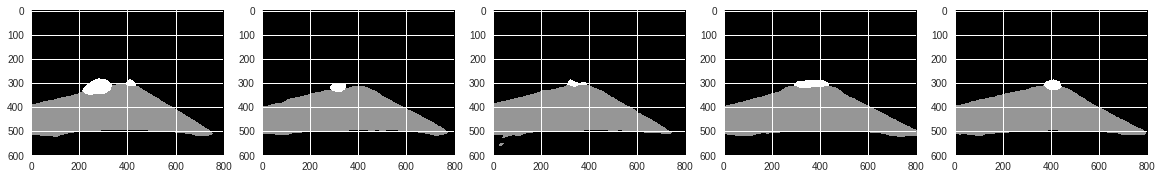

In [89]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=len(temp), figsize=(20, 5))

for img, ax in zip(temp, axes):
    ax.imshow(img, cmap='Greys_r')

### Infer

In [28]:
!apt-get install -qq -y ffmpeg
!pip install scikit-video imageio
# import skvideo.io

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  dbus i965-va-driver libaacs0 libapparmor1 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2
  libboost-filesystem1.62.0 libboost-system1.62.0 libbs2b0 libcaca0 libcairo2
  libcapnp-0.5.3 libcdio-cdda1 libcdio-paranoia1 libcdio13 libchromaprint1
  libcrystalhd3 libdbus-1-3 libdc1394-22 libdrm-amdgpu1 libdrm-common
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl1-mesa libelf1
  libfftw3-double3 libflac8 libflite1 libfribidi0 libgbm1 libgl1-mesa-dri
  libgl1-mesa-glx libglapi-mesa libgme0 libgraphite2-3 libgsm1 libharfbuzz0b
  libiec61883-0 libjack-jackd2-0 libllvm5.0 libmirclient9 libmircommon7
  libmircore1 libmirprotobuf3 libmp3lame0 libmpg123-0 libnuma1 libogg0
  libopenal-data libopenal1 libopencv-core3.1 libopencv-imgpr

Get:42 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebp6 amd64 0.6.0-3 [181 kB]
Get:43 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebpmux3 amd64 0.6.0-3 [20.0 kB]
Get:44 http://archive.ubuntu.com/ubuntu artful/universe amd64 libx264-148 amd64 2:0.148.2795+gitaaa9aa8-1 [604 kB]
Get:45 http://archive.ubuntu.com/ubuntu artful/universe amd64 libx265-130 amd64 2.5-2 [1,044 kB]
Get:46 http://archive.ubuntu.com/ubuntu artful/universe amd64 libxvidcore4 amd64 2:1.3.4-1 [206 kB]
Get:47 http://archive.ubuntu.com/ubuntu artful/universe amd64 libzvbi-common all 0.2.35-13 [32.1 kB]
Get:48 http://archive.ubuntu.com/ubuntu artful/universe amd64 libzvbi0 amd64 0.2.35-13 [235 kB]
Get:49 http://archive.ubuntu.com/ubuntu artful/universe amd64 libavcodec57 amd64 7:3.3.4-2 [4,513 kB]
Get:50 http://archive.ubuntu.com/ubuntu artful/main amd64 libasound2-data all 1.1.3-5 [36.1 kB]
Get:51 http://archive.ubuntu.com/ubuntu artful/main amd64 libasound2 amd64 1.1.3-5 [357 kB]
Get:52 http://arc

Unpacking libogg0:amd64 (1.3.2-1) ...
Selecting previously unselected package libxinerama1:amd64.
Preparing to unpack .../002-libxinerama1_2%3a1.1.3-1_amd64.deb ...
Unpacking libxinerama1:amd64 (2:1.1.3-1) ...
Selecting previously unselected package libxshmfence1:amd64.
Preparing to unpack .../003-libxshmfence1_1.2-1_amd64.deb ...
Unpacking libxshmfence1:amd64 (1.2-1) ...
Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../004-libxxf86vm1_1%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86vm1:amd64 (1:1.1.4-1) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../005-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../006-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../007-dbus_1.10.22-

Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../062-libssh-gcrypt-4_0.7.5-1_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.7.5-1) ...
Selecting previously unselected package libavformat57:amd64.
Preparing to unpack .../063-libavformat57_7%3a3.3.4-2_amd64.deb ...
Unpacking libavformat57:amd64 (7:3.3.4-2) ...
Selecting previously unselected package libavresample3:amd64.
Preparing to unpack .../064-libavresample3_7%3a3.3.4-2_amd64.deb ...
Unpacking libavresample3:amd64 (7:3.3.4-2) ...
Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../065-libbs2b0_3.1.0+dfsg-2.2_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2) ...
Selecting previously unselected package libflite1:amd64.
Preparing to unpack .../066-libflite1_2.0.0-release-4_amd64.deb ...
Unpacking libflite1:amd64 (2.0.0-release-4) ...
Selecting previously unselected package libtbb2:amd64.
Preparing to unpack .../067-libtbb2_2017~U7-6_amd64.deb ...
Unpacking libtbb

Selecting previously unselected package libxcb-xfixes0:amd64.
Preparing to unpack .../121-libxcb-xfixes0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-xfixes0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libegl1-mesa:amd64.
Preparing to unpack .../122-libegl1-mesa_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking libegl1-mesa:amd64 (17.2.8-0ubuntu0~17.10.1) ...
Selecting previously unselected package libwayland-egl1-mesa:amd64.
Preparing to unpack .../123-libwayland-egl1-mesa_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking libwayland-egl1-mesa:amd64 (17.2.8-0ubuntu0~17.10.1) ...
Selecting previously unselected package libxcursor1:amd64.
Preparing to unpack .../124-libxcursor1_1%3a1.1.14-3ubuntu0.1_amd64.deb ...
Unpacking libxcursor1:amd64 (1:1.1.14-3ubuntu0.1) ...
Selecting previously unselected package libxi6:amd64.
Preparing to unpack .../125-libxi6_2%3a1.7.9-1_amd64.deb ...
Unpacking libxi6:amd64 (2:1.7.9-1) ...
Selecting previously unselected package libxrandr2:am

Setting up libswresample2:amd64 (7:3.3.4-2) ...
Setting up libsndfile1:amd64 (1.0.28-4) ...
Setting up i965-va-driver:amd64 (1.8.3-1ubuntu1) ...
Setting up libgl1-mesa-glx:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /usr/lib/x86_64-linux-gnu/mesa/ld.so.conf to provide /etc/ld.so.conf.d/x86_64-linux-gnu_GL.conf (x86_64-linux-gnu_gl_conf) in auto mode
Setting up libswscale4:amd64 (7:3.3.4-2) ...
Setting up mesa-va-drivers:amd64 (17.2.8-0ubuntu0~17.10.1) ...
Setting up libpostproc54:amd64 (7:3.3.4-2) ...
Setting up libmircommon7:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Setting up vdpau-driver-all:amd64 (1.1.1-3ubuntu1) ...
Setting up libavresample3:amd64 (7:3.3.4-2) ...
Setting up libavcodec57:amd64 (7:3.3.4-2) ...
Setting up libmirclient9:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Setting up libpulse0:amd64 (1:10.0-2ubuntu3.1) ...
Setting up va-driver-all:amd64 (1.8.3-2) ...
Setting up libegl1-mesa:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /u

In [0]:
import imageio
import numpy as np
import tensorflow as tf
import skvideo.io

import bn_common

def infer_images(in_imgs):
    tf.reset_default_graph()
  
    raw_inputs = tf.placeholder(dtype=tf.uint8, shape=(None, 600, 800, 3))
    sess, raw_output_up = bn_common.recreate_bn_model(raw_inputs)
    
    out_imgs = []
    batch_size = 64
    for batch_i in range(0, len(in_imgs), batch_size):
        in_imgs_batch = in_imgs[batch_i : batch_i+batch_size]
        out_imgs_batch = sess.run(raw_output_up, feed_dict={raw_inputs: in_imgs_batch})
        for out_img in out_imgs_batch:
            out_imgs.append(out_img)
    
    sess.close()
    
    return out_imgs

  
def infer_image_paths_to_images(in_paths):
    in_imgs = np.array([imageio.imread(in_path) for in_path in in_paths])
    
    return infer_images(in_imgs)

def infer_image_paths_to_video(in_paths, out_path):
    skvideo.io.vwrite(out_path, np.array(infer_image_paths_to_images(in_paths)))

# temp = infer_image_paths_to_images(glob.glob(os.path.join(HOME_PATH, 'CameraRGB/F[67]?-*'))[:5])

infer_image_paths_to_video(glob.glob(os.path.join(HOME_PATH, 'CameraRGB/F[67]?-*')), './F6.mp4')

restoring from ./snapshots/model.ckpt-150


INFO:tensorflow:Restoring parameters from ./snapshots/model.ckpt-150


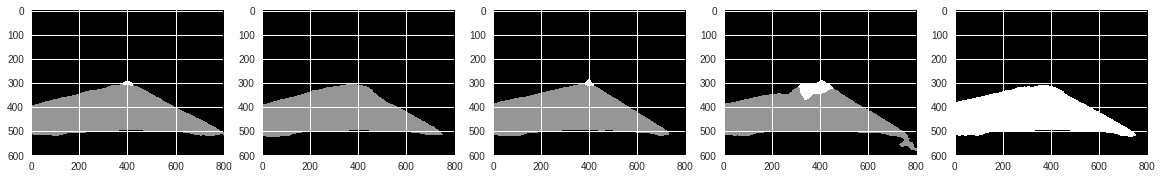

In [46]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=len(temp), figsize=(20, 5))

for img, ax in zip(temp, axes):
    ax.imshow(img, cmap='Greys_r')

In [54]:
!mkdir -p videos
!gsutil -m cp gs://ysono-ml/datasets/carla/*mp4 videos/

Copying gs://ysono-ml/datasets/carla/test_video_large.mp4...
Copying gs://ysono-ml/datasets/carla/graded_video.mp4...
Copying gs://ysono-ml/datasets/carla/test_video_small.mp4...
\ [3/3 files][ 47.1 MiB/ 47.1 MiB] 100% Done                                    
Operation completed over 3 objects/47.1 MiB.                                     


In [55]:
!for f in $(ls videos); do echo python bn_infer_video.py $f; done

python bn_infer_video.py graded_video.mp4
python bn_infer_video.py test_video_large.mp4
python bn_infer_video.py test_video_small.mp4


In [91]:
!mkdir -p out_videos
!python bn_draw_video.py videos/test_video_small.mp4

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-05-22 17:08:29.785490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-05-22 17:08:29.786181: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-05-22 17:08:29.786225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2018-05-22 17:08:30.177564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExec

In [92]:
!ls -l out_videos

total 260
-rw-r--r-- 1 root root 263043 May 22 17:08 test_video_small.mp4


In [93]:
!gsutil -m cp -n out_videos/* gs://ysono-ml/models/icnet/cityscape-hellochick/out_videos/

Copying file://out_videos/test_video_small.mp4 [Content-Type=video/mp4]...
/ [1/1 files][256.9 KiB/256.9 KiB] 100% Done                                    
Operation completed over 1 objects/256.9 KiB.                                    


In [0]:
%load bn_draw_video.py